In [ ]:
import numpy as np
from tensorflow.keras.models import Model
from Data_Preparation.data_preparation import Data_Preparation
from Data_Preparation.data_preparation_with_fourier import Data_Preparation_with_Fourier
from digitalFilters.dfilters import FIR_test_Dataset, IIR_test_Dataset
from deepFilter.dl_pipeline import train_dl, test_dl

In [ ]:
# Unpack the dataset
Dataset, valid_train_indices, valid_test_indices = Data_Preparation_with_Fourier(samples=512, fs=360)
X_train, y_train, X_test, y_test, F_train_x, F_train_y, F_test_x, F_test_y = Dataset

# Print dataset shapes for confirmation
print(f"Time domain train shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Frequency domain train shapes: F_train_x: {F_train_x.shape}, F_train_y: {F_train_y.shape}")
print(f"Time domain test shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Frequency domain test shapes: F_test_x: {F_test_x.shape}, F_test_y: {F_test_y.shape}")

In [ ]:
import os
# 데이터 저장 경로 설정
output_dir = "0212_censd"
os.makedirs(output_dir, exist_ok=True)

# 데이터 저장
np.save(f"{output_dir}/X_train.npy", X_train)
np.save(f"{output_dir}/y_train.npy", y_train)
np.save(f"{output_dir}/X_test.npy", X_test)
np.save(f"{output_dir}/y_test.npy", y_test)
np.save(f"{output_dir}/F_train_x.npy", F_train_x)
np.save(f"{output_dir}/F_train_y.npy", F_train_y)
np.save(f"{output_dir}/F_test_x.npy", F_test_x)
np.save(f"{output_dir}/F_test_y.npy", F_test_y)

print(f"Data successfully saved in {output_dir} directory!")


In [40]:
# 데이터 저장 경로 설정
output_dir = "shap"

# 데이터 로드
X_train = np.load(f"{output_dir}/X_train.npy")
y_train = np.load(f"{output_dir}/y_train.npy")
X_test = np.load(f"{output_dir}/X_test.npy")
y_test = np.load(f"{output_dir}/y_test.npy")
F_train_x = np.load(f"{output_dir}/F_train_x.npy")
F_train_y = np.load(f"{output_dir}/F_train_y.npy")
F_test_x = np.load(f"{output_dir}/F_test_x.npy")
F_test_y = np.load(f"{output_dir}/F_test_y.npy")

print(f"Data successfully loaded! Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"F_train_x: {F_train_x.shape}, F_train_y: {F_train_y.shape}")
print(f"F_test_x: {F_test_x.shape}, F_test_y: {F_test_y.shape}")


Data successfully loaded! Shapes:
X_train: (72002, 512, 1), y_train: (72002, 512, 1)
X_test: (13316, 512, 1), y_test: (13316, 512, 1)
F_train_x: (72002, 512, 1), F_train_y: (72002, 512, 1)
F_test_x: (13316, 512, 1), F_test_y: (13316, 512, 1)


In [41]:
X_train[:1].shape

(1, 512, 1)

In [42]:
import numpy as np
import tensorflow as tf

from deepFilter.dl_models import Transformer_COMBDAE
model = Transformer_COMBDAE()
# 3. 입력 데이터 준비
X_test = np.load("shap/X_test.npy")
F_test_x = np.load("shap/F_test_x.npy")
model.build(input_shape=[(None, 512, 1), (None, 512, 1)])  # 입력 크기 명시

try:
    model.load_weights("shap/Transformer_COMBDAE_weights.best.weights.h5")
    print("Model weights loaded successfully!")
except ValueError as e:
    print(f"Error loading weights: {e}")
# attention_layer = model.get_layer("multi_head_attention_3")

/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Error loading weights: A total of 72 objects could not be loaded. Example error message for object <EinsumDense name=key, built=True>:

Layer 'key' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <FANLayer name=fan_layer, built=True>, <Dense name=dense_1, built=True>, <Dense name=dense, built=True>, <Dense name=dense_2, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <FANLayer name=fan_layer_1, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_3, built=True>, <Dense name=dense_5, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, bu

In [19]:
all_outputs

[array([[[ 0.00714556,  0.02566104, -0.0070718 , ...,  0.04170229,
           0.01501222,  0.02247918],
         [ 0.00714528,  0.02567165, -0.00702972, ...,  0.04169848,
           0.01500625,  0.02245362],
         [ 0.00710801,  0.02569404, -0.00702376, ...,  0.04173107,
           0.01498961,  0.02245246],
         ...,
         [ 0.00713593,  0.0256907 , -0.00705863, ...,  0.04170609,
           0.01503017,  0.02245297],
         [ 0.00714802,  0.0256866 , -0.0070516 , ...,  0.04170913,
           0.01502605,  0.02247215],
         [ 0.00714841,  0.02567508, -0.00704692, ...,  0.0417159 ,
           0.01501044,  0.02247025]]], dtype=float32),
 array([[[ 0.00039019,  0.03629823,  0.04044892, ...,  0.02157174,
          -0.06779309, -0.06426705],
         [ 0.00039386,  0.03624731,  0.04045422, ...,  0.02157007,
          -0.06787635, -0.06422251],
         [ 0.00037047,  0.03620769,  0.04039393, ...,  0.02154893,
          -0.06788014, -0.06417347],
         ...,
         [ 0.00043

In [22]:
attention_layer_names

['multi_head_attention',
 'multi_head_attention_1',
 'multi_head_attention_2',
 'multi_head_attention_3',
 'multi_head_attention_4',
 'multi_head_attention_5',
 'multi_head_attention_6',
 'multi_head_attention_7']

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


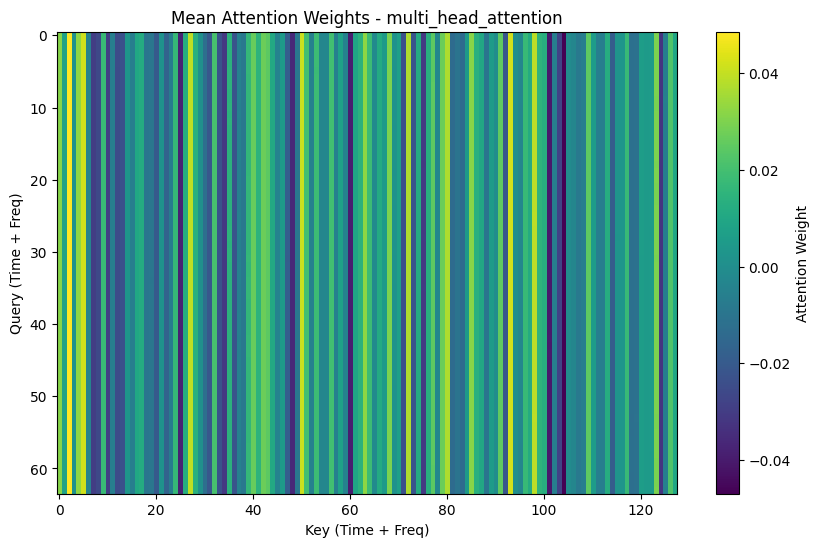

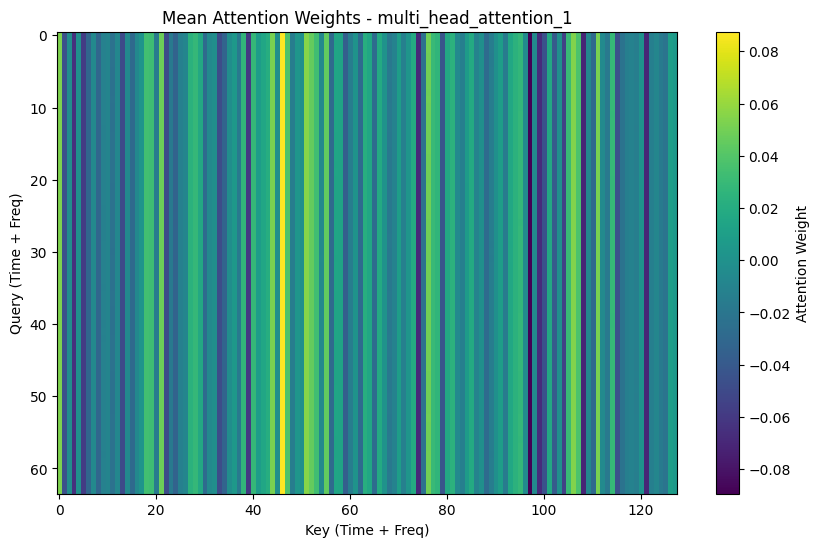

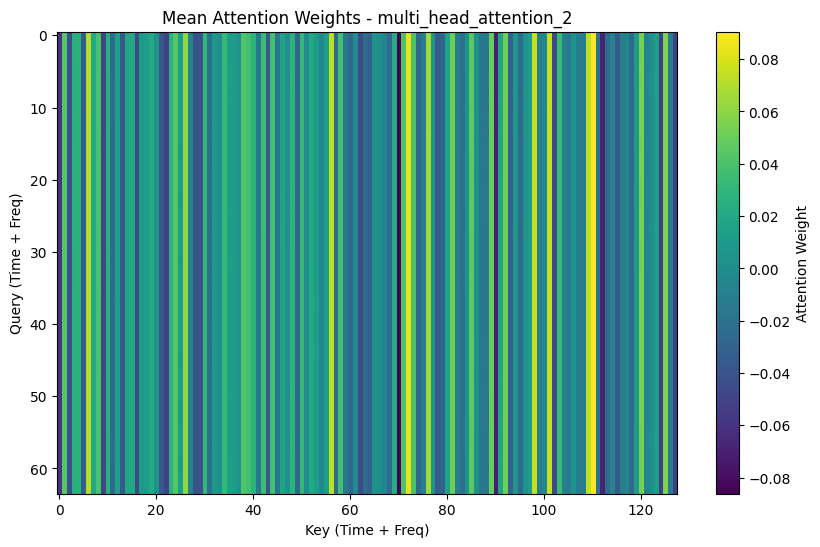

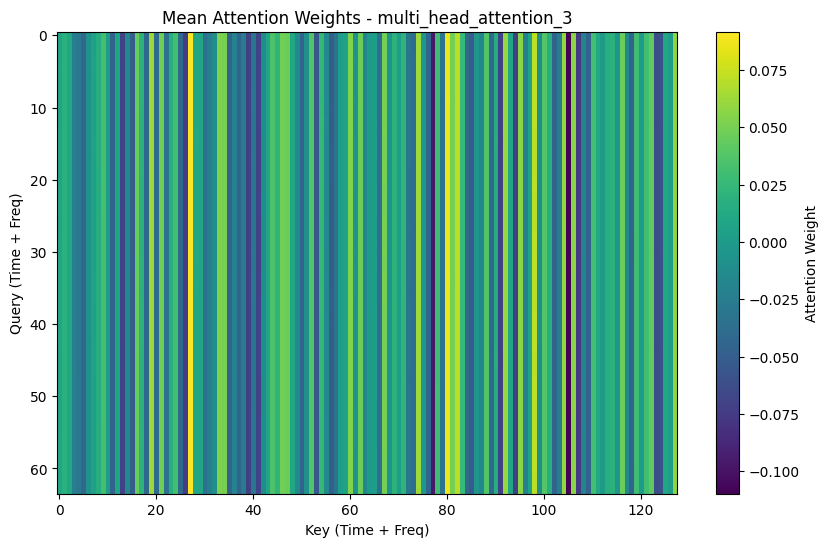

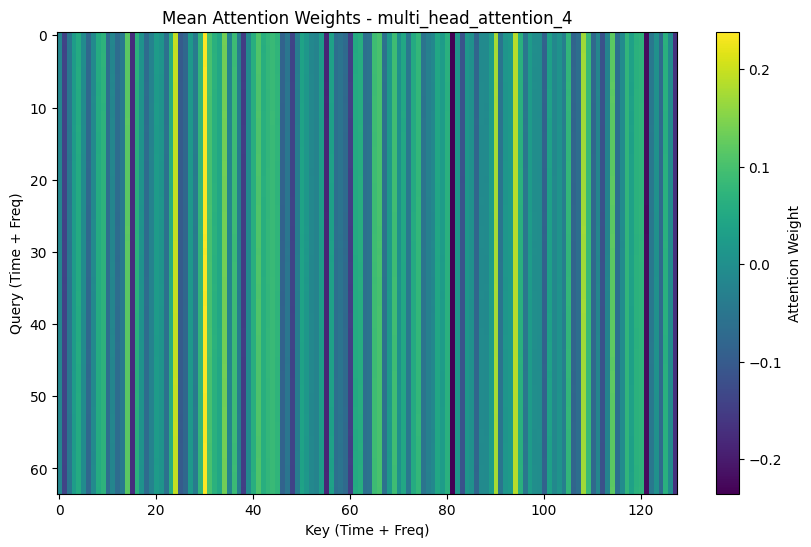

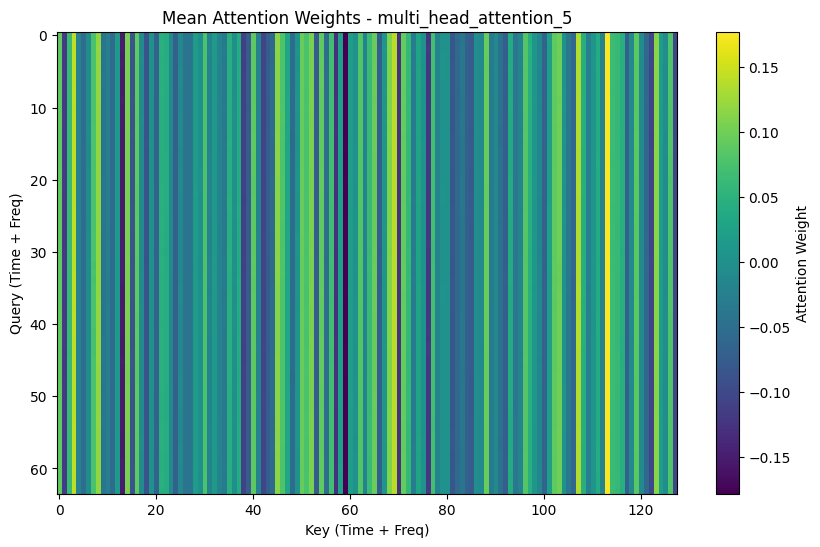

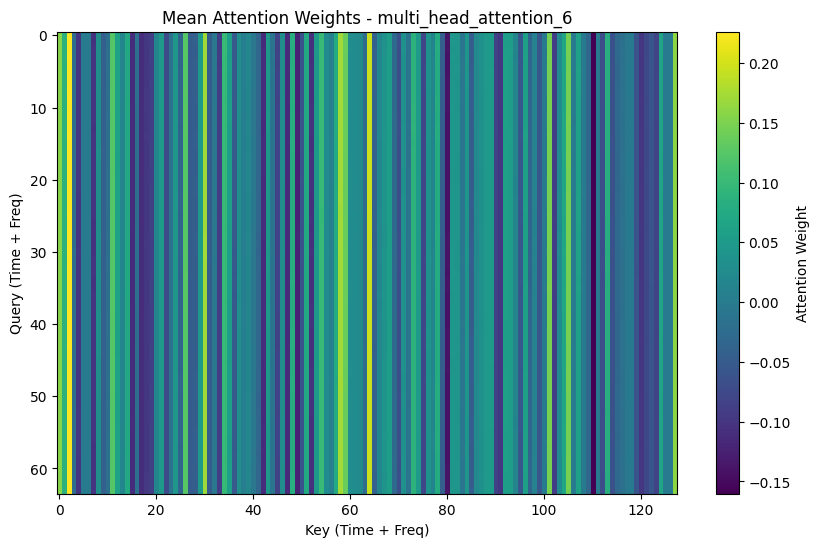

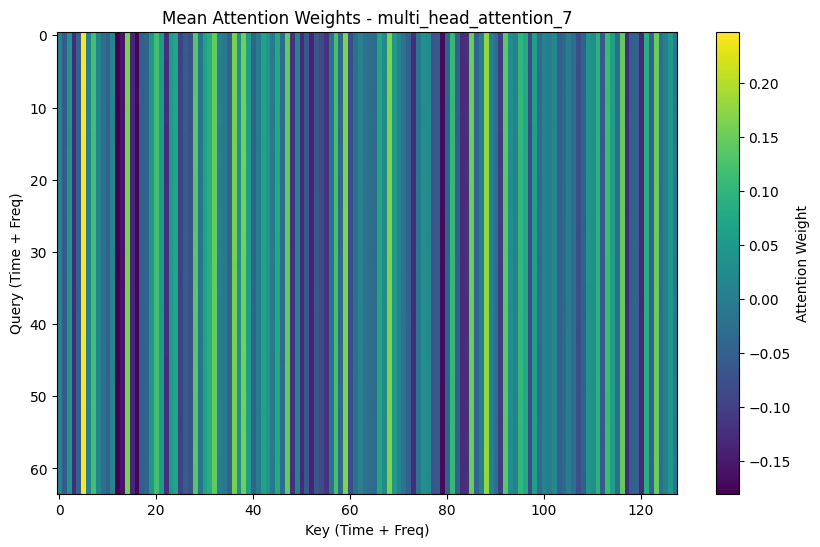

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# 모든 MultiHeadAttention 레이어 이름 확인
attention_layer_names = []
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.MultiHeadAttention):
        attention_layer_names.append(layer.name)

# 중간 출력 모델 생성 (각 Attention 레이어의 출력 + 최종 예측 추출)
inputs = model.input  # [time_input, freq_input]
outputs = [model.get_layer(name).output for name in attention_layer_names] + [model.output]  # 9개 출력
attention_model = Model(inputs=inputs, outputs=outputs)

# 테스트 데이터로 Attention 가중치 추출
[X_test_sample, F_test_x_sample] = [X_test[:1], F_test_x[:1]]  # 배치 크기 1로 샘플링

# print(f"Input shapes - X_test_sample: {X_test_sample.shape}, F_test_x_sample: {F_test_x_sample.shape}")  # 입력 shape 확인
#  X_test_sample: (1, 512, 1), F_test_x_sample: (1, 512, 1)
# 중간 출력 모델 예측
all_outputs = attention_model.predict([X_test_sample, F_test_x_sample])
# print(f"Number of outputs: {len(all_outputs)}")  # 출력 개수 확인
# Number of outputs: 9
# 출력값 언팩 (4개의 Attention 출력 + 1개의 최종 예측)
attention_outputs = all_outputs[:-1]  # 첫 8개는 Attention 출력 (리스트)
predictions = all_outputs[-1]  # 마지막은 최종 예측
# print(f"Predictions shape: {predictions.shape}")  # 최종 예측 shape 확인
# # Predictions shape: (1, 512, 1
# Attention 가중치 출력 및 시각화
for i, (name, att_output) in enumerate(zip(attention_layer_names, attention_outputs)):
    # print(f"Attention Layer: {name}, Output shape: {att_output.shape}")  # 각 Attention 출력 shape 확인
    # Attention Layer: multi_head_attention, Output shape: (1, 64, 128)
    # Attention 가중치 추출 (MultiHeadAttention의 출력은 (1, 64, 128)이므로, 실제 가중치 추출 필요)
    if len(att_output.shape) == 3 and att_output.shape[-1] == 128:  # (1, 64, 128) 확인
        # MultiHeadAttention의 실제 Attention 가중치 추출 (return_attention_scores=True 사용)
        # 커스텀 레이어를 사용하거나, 출력에서 가중치 추정
        # 여기서는 출력 shape을 기반으로 가정
        # att_output[0]의 shape: (64, 128)
        
        # 방법 1: (64, 128)에서 2D로 변환 (예: Query와 Key 간 관계 유지)
        # mean_att_weights = np.mean(att_output, axis=0)  # (13316, 64, 128) -> (64, 128)
        mean_att_weights = att_output[0]  
        # # (64, 128) 유지
        # print(f"Mean Attention Weights shape: {mean_att_weights.shape}")  # 평균 Attention 가중치 shape 확인
        if mean_att_weights.shape == (64, 128):
            plt.figure(figsize=(10, 6))
            plt.imshow(mean_att_weights, cmap='viridis', aspect='auto')
        else:
            # 방법 2: MultiHeadAttention의 가중치로 가정 (헤드별 평균)
            # 만약 att_output이 실제 Attention 가중치라면 (1, 8, 64, 64) 형태일 가능성
            # att_output을 (1, 64, 128)에서 (1, 8, 64, 64)로 재구성하려면 모델 구조 확인 필요
            try:
                # 헤드 수(8)로 가정하고 reshape (실제 헤드 수 확인 필요)
                # (64, 128) -> (8, 64, 16)로 가정 (128 / 8 = 16)
                reshaped_att = att_output[0].reshape(8, 64, 16)  # 가정
                print(f"Reshaped Attention Weights shape: {reshaped_att.shape}")  # Reshape 후 shape 확인
                mean_att_weights = np.mean(reshaped_att, axis=0)  # (64, 16)
                print(f"Mean Reshaped Attention Weights shape: {mean_att_weights.shape}")  # 평균 Reshape 후 shape 확인
                # 2D로 확장 (예: (64, 64)로 패딩)
                mean_att_weights_2d = np.pad(mean_att_weights, ((0, 0), (0, 48)), mode='constant')  # (64, 64)
                print(f"2D Padded Attention Weights shape: {mean_att_weights_2d.shape}")  # 2D 패딩 후 shape 확인
                plt.figure(figsize=(8, 6))
                plt.imshow(mean_att_weights_2d, cmap='viridis', aspect='auto')
            except ValueError as e:
                print(f"Error reshaping attention weights: {e}")
                raise ValueError(f"Cannot reshape att_output[0] with shape {att_output[0].shape} into expected (8, 64, 16)")

        plt.colorbar(label="Attention Weight")
        plt.xlabel("Key (Time + Freq)")
        plt.ylabel("Query (Time + Freq)")
        plt.title(f"Mean Attention Weights - {name}")
        # plt.axvline(x=31.5, color='r', linestyle='--')  # 시간-주파수 경계 가정 (64개의 토큰 중 32는 시간, 32는 주파수로 가정)
        # plt.axhline(y=31.5, color='r', linestyle='--')
        plt.show()
    else:
        raise ValueError(f"Unexpected shape for att_output: {att_output.shape}")

417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
Reshaped Attention Weights shape: (8, 64, 16)
Mean Reshaped Attention Weights shape: (64, 16)
2D Padded Attention Weights shape: (64, 64)


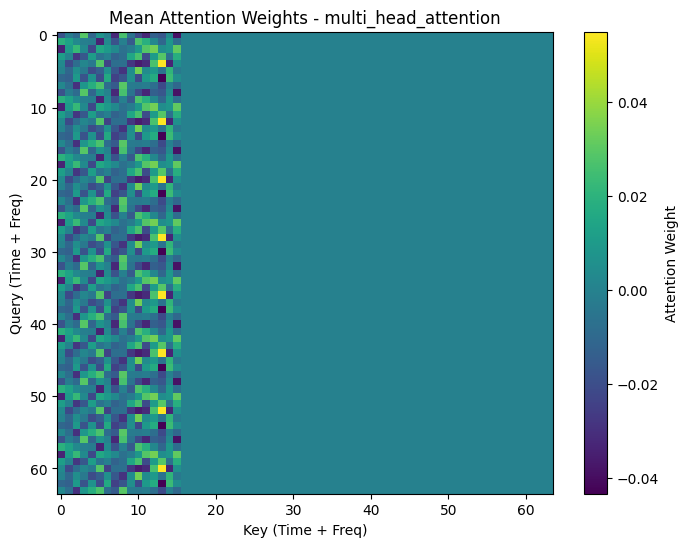

Reshaped Attention Weights shape: (8, 64, 16)
Mean Reshaped Attention Weights shape: (64, 16)
2D Padded Attention Weights shape: (64, 64)


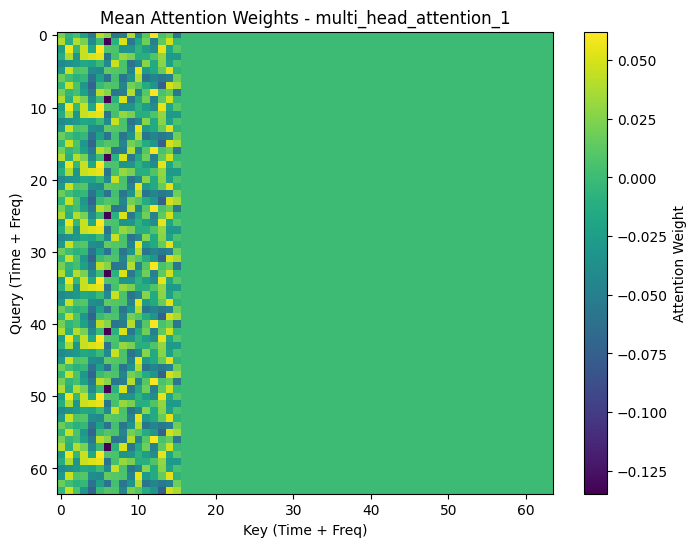

Reshaped Attention Weights shape: (8, 64, 16)
Mean Reshaped Attention Weights shape: (64, 16)
2D Padded Attention Weights shape: (64, 64)


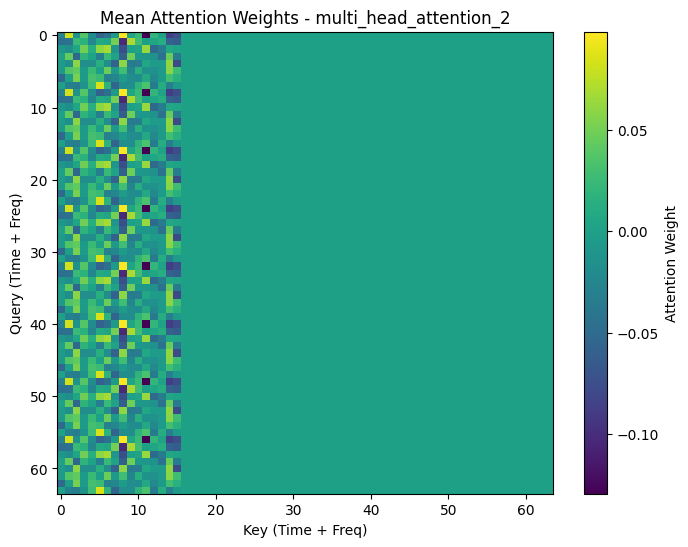

Reshaped Attention Weights shape: (8, 64, 16)
Mean Reshaped Attention Weights shape: (64, 16)
2D Padded Attention Weights shape: (64, 64)


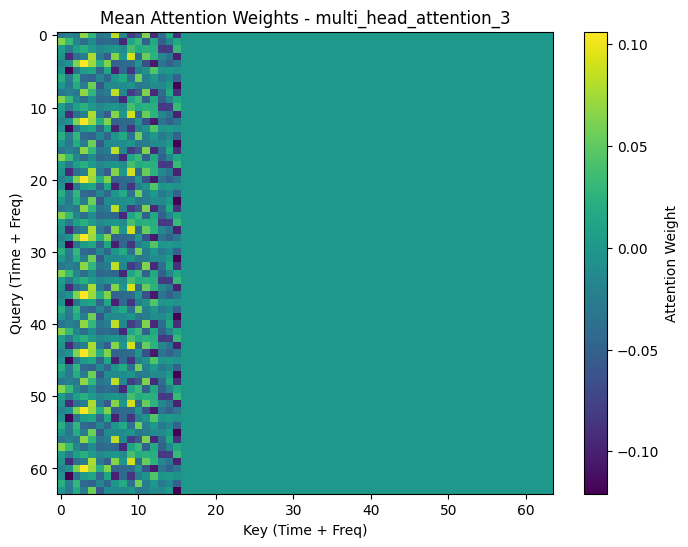

Reshaped Attention Weights shape: (8, 64, 16)
Mean Reshaped Attention Weights shape: (64, 16)
2D Padded Attention Weights shape: (64, 64)


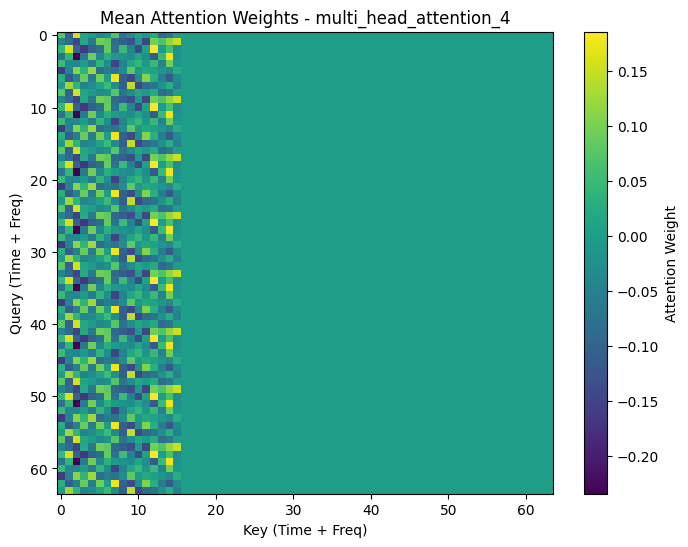

Reshaped Attention Weights shape: (8, 64, 16)
Mean Reshaped Attention Weights shape: (64, 16)
2D Padded Attention Weights shape: (64, 64)


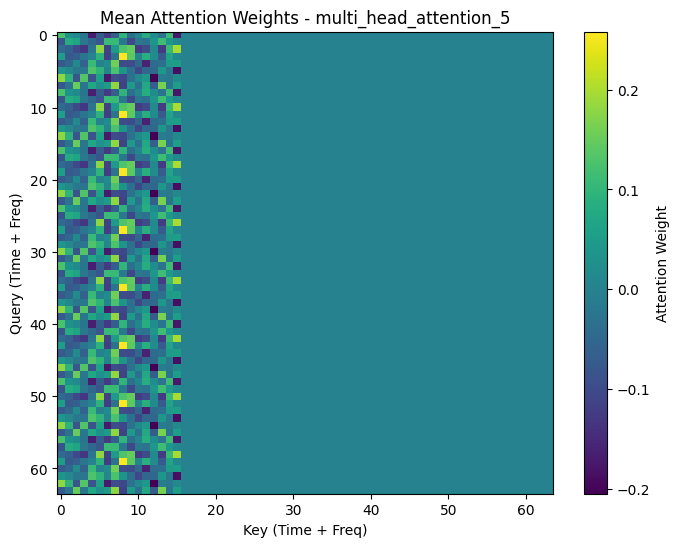

Reshaped Attention Weights shape: (8, 64, 16)
Mean Reshaped Attention Weights shape: (64, 16)
2D Padded Attention Weights shape: (64, 64)


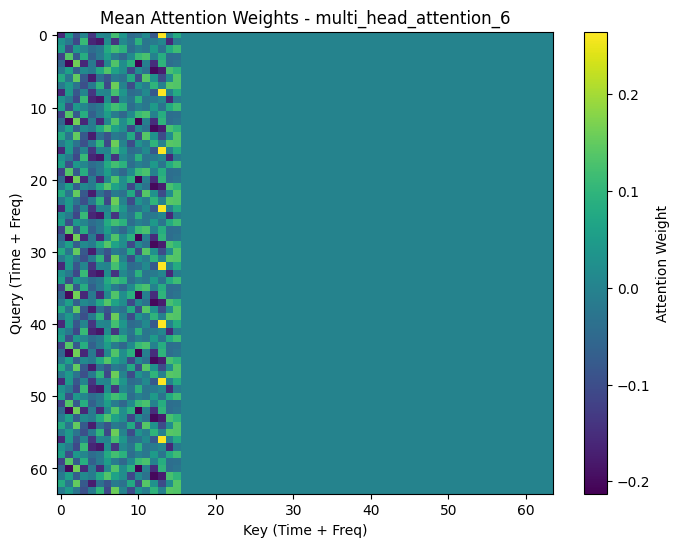

Reshaped Attention Weights shape: (8, 64, 16)
Mean Reshaped Attention Weights shape: (64, 16)
2D Padded Attention Weights shape: (64, 64)


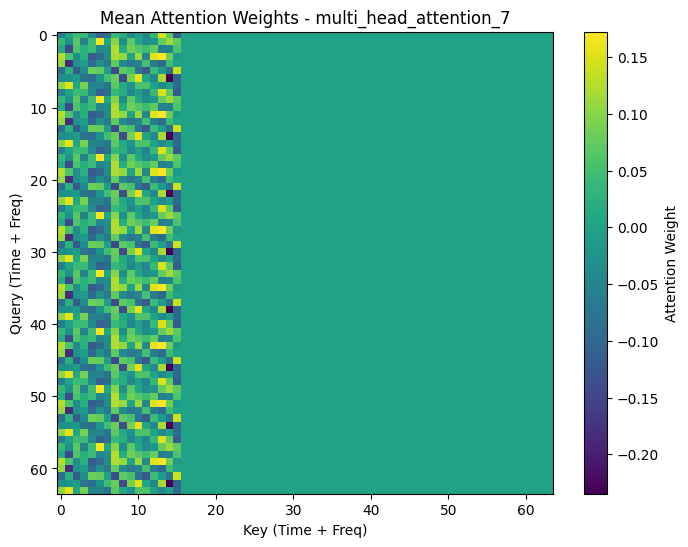

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

# 모든 MultiHeadAttention 레이어 이름 확인
attention_layer_names = []
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.MultiHeadAttention):
        attention_layer_names.append(layer.name)

# 중간 출력 모델 생성 (각 Attention 레이어의 출력 + 최종 예측 추출)
inputs = model.input  # [time_input, freq_input]
outputs = [model.get_layer(name).output for name in attention_layer_names] + [model.output]  # 9개 출력
attention_model = Model(inputs=inputs, outputs=outputs)

# 테스트 데이터로 Attention 가중치 추출
[X_test_sample, F_test_x_sample] = [X_test, F_test_x]  # 배치 크기 1로 샘플링

# print(f"Input shapes - X_test_sample: {X_test_sample.shape}, F_test_x_sample: {F_test_x_sample.shape}")  # 입력 shape 확인
#  X_test_sample: (1, 512, 1), F_test_x_sample: (1, 512, 1)
# 중간 출력 모델 예측
all_outputs = attention_model.predict([X_test_sample, F_test_x_sample])
# print(f"Number of outputs: {len(all_outputs)}")  # 출력 개수 확인
# Number of outputs: 9
# 출력값 언팩 (4개의 Attention 출력 + 1개의 최종 예측)
attention_outputs = all_outputs[:-1]  # 첫 8개는 Attention 출력 (리스트)
predictions = all_outputs[-1]  # 마지막은 최종 예측
# print(f"Predictions shape: {predictions.shape}")  # 최종 예측 shape 확인
# # Predictions shape: (1, 512, 1
# Attention 가중치 출력 및 시각화
for i, (name, att_output) in enumerate(zip(attention_layer_names, attention_outputs)):
    # print(f"Attention Layer: {name}, Output shape: {att_output.shape}")  # 각 Attention 출력 shape 확인
    # Attention Layer: multi_head_attention, Output shape: (1, 64, 128)
    # Attention 가중치 추출 (MultiHeadAttention의 출력은 (1, 64, 128)이므로, 실제 가중치 추출 필요)
    if len(att_output.shape) == 3 and att_output.shape[-1] == 128:  # (1, 64, 128) 확인
        # MultiHeadAttention의 실제 Attention 가중치 추출 (return_attention_scores=True 사용)
        # 커스텀 레이어를 사용하거나, 출력에서 가중치 추정
        # 여기서는 출력 shape을 기반으로 가정
        # att_output[0]의 shape: (64, 128)
        
        mean_att_weights = np.mean(att_output, axis=(0, 1))  # (13316, 64, 128) -> (64, 128)
        if mean_att_weights.shape == (64, 128):
            plt.figure(figsize=(10, 6))
            plt.imshow(mean_att_weights, cmap='viridis', aspect='auto')
        else:
            # 방법 2: MultiHeadAttention의 가중치로 가정 (헤드별 평균)
            # 만약 att_output이 실제 Attention 가중치라면 (1, 8, 64, 64) 형태일 가능성
            # att_output을 (1, 64, 128)에서 (1, 8, 64, 64)로 재구성하려면 모델 구조 확인 필요
            try:
                # 헤드 수(8)로 가정하고 reshape (실제 헤드 수 확인 필요)
                # (64, 128) -> (8, 64, 16)로 가정 (128 / 8 = 16)
                reshaped_att = att_output[0].reshape(8, 64, 16)  # 가정
                print(f"Reshaped Attention Weights shape: {reshaped_att.shape}")  # Reshape 후 shape 확인
                mean_att_weights = np.mean(reshaped_att, axis=0)  # (64, 16)
                print(f"Mean Reshaped Attention Weights shape: {mean_att_weights.shape}")  # 평균 Reshape 후 shape 확인
                # 2D로 확장 (예: (64, 64)로 패딩)
                mean_att_weights_2d = np.pad(mean_att_weights, ((0, 0), (0, 48)), mode='constant')  # (64, 64)
                print(f"2D Padded Attention Weights shape: {mean_att_weights_2d.shape}")  # 2D 패딩 후 shape 확인
                plt.figure(figsize=(8, 6))
                plt.imshow(mean_att_weights_2d, cmap='viridis', aspect='auto')
            except ValueError as e:
                print(f"Error reshaping attention weights: {e}")
                raise ValueError(f"Cannot reshape att_output[0] with shape {att_output[0].shape} into expected (8, 64, 16)")

        plt.colorbar(label="Attention Weight")
        plt.xlabel("Key (Time + Freq)")
        plt.ylabel("Query (Time + Freq)")
        plt.title(f"Mean Attention Weights - {name}")
        # plt.axvline(x=31.5, color='r', linestyle='--')  # 시간-주파수 경계 가정 (64개의 토큰 중 32는 시간, 32는 주파수로 가정)
        # plt.axhline(y=31.5, color='r', linestyle='--')
        plt.show()
    else:
        raise ValueError(f"Unexpected shape for att_output: {att_output.shape}")

In [46]:
attention_layer_names

['multi_head_attention',
 'multi_head_attention_1',
 'multi_head_attention_2',
 'multi_head_attention_3',
 'multi_head_attention_4',
 'multi_head_attention_5',
 'multi_head_attention_6',
 'multi_head_attention_7']

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, MultiHeadAttention
from tensorflow.keras.models import Model

class GetAttentionWeights(Layer):
    def __init__(self, layer_name, model, num_heads=8, **kwargs):
        super(GetAttentionWeights, self).__init__(**kwargs)
        self.layer_name = layer_name
        self.attention_layer = None
        self.model = model  # 최상위 모델 참조 추가
        self.num_heads = num_heads  # 헤드 수를 매개변수로 전달

    def build(self, input_shape):
        # 최상위 모델에서 레이어 검색
        try:
            self.attention_layer = self._find_layer_in_model(self.layer_name)
            if self.attention_layer is None:
                for layer in self.model.layers:
                    if layer.name == self.layer_name or f"{layer.name}" in self.layer_name:
                        self.attention_layer = layer
                        break
                if self.attention_layer is None:
                    raise ValueError(f"Layer {self.layer_name} not found in the model.")
            
            # MultiHeadAttention의 실제 헤드 수 확인
            if isinstance(self.attention_layer, MultiHeadAttention):
                self.num_heads = self.attention_layer.num_heads  # 동적으로 헤드 수 가져오기
        except AttributeError:
            raise ValueError(f"Could not find or access layer {self.layer_name} in the model.")
        super().build(input_shape)

    def _find_layer_in_model(self, layer_name):
        # 최상위 모델에서 레이어 검색
        if self.model is not None and isinstance(self.model, Model):
            return self.model.get_layer(layer_name)
        return None

    def call(self, inputs):
        # inputs는 [query, key, value] 또는 단일 입력일 수 있음
        if not isinstance(inputs, (list, tuple)):
            inputs = [inputs, inputs, inputs]  # Query, Key, Value로 변환
        query, key, value = inputs

        # MultiHeadAttention 호출 및 Attention 가중치 추출
        attention_output, attention_weights = self.attention_layer(
            query, key, value, return_attention_scores=True
        )
        return attention_output, attention_weights

    def compute_output_shape(self, input_shape):
        # input_shape이 리스트/튜플일 경우 처리
        if isinstance(input_shape, (list, tuple)):
            # time_input과 freq_input의 shape 추출 (각 (None, 512, 1))
            if len(input_shape) == 2:
                time_shape, freq_shape = input_shape
                if not (isinstance(time_shape, tf.TensorShape) and isinstance(freq_shape, tf.TensorShape)):
                    time_shape = tf.TensorShape(time_shape)
                    freq_shape = tf.TensorShape(freq_shape)
                # Concatenate 이후 shape 가정: (None, 64, 128)
                batch_size = time_shape[0]  # None 또는 정수
                seq_len = 64  # Conv1D로 축소된 시퀀스 길이
                d_model = 128  # 특징 차원 (64 + 64)
            else:
                raise ValueError(f"Unexpected input_shape format: {input_shape}")
        else:
            # 단일 TensorShape로 전달된 경우 (예: (None, 64, 128))
            if not isinstance(input_shape, tf.TensorShape):
                input_shape = tf.TensorShape(input_shape)
            batch_size = input_shape[0]  # None 또는 정수
            seq_len = input_shape[1]  # 시퀀스 길이 (예: 64)
            d_model = input_shape[2]  # 특징 차원 (예: 128)

        # 출력 shape 정의: (batch, seq_len, d_model)와 (batch, heads, seq_len, seq_len)
        attention_output_shape = tf.TensorShape([batch_size, seq_len, d_model])
        attention_weights_shape = tf.TensorShape([batch_size, self.num_heads, seq_len, seq_len])

        return [attention_output_shape, attention_weights_shape]

# 모델에서 Attention 레이어 이름 확인 및 수정
attention_layer_names = []
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.MultiHeadAttention):
        attention_layer_names.append(layer.name)
print("Found Attention layers:", attention_layer_names)

# multi_head_attention으로 시작하는 이름만 필터링
unique_attention_names = [name for name in attention_layer_names if name.startswith('multi_head_attention')]
print("Unique Attention layers (starting with 'multi_head_attention'):", unique_attention_names)

# 중간 출력 모델 생성 (각 Attention 레이어의 출력 + 최종 예측)
inputs = model.input  # [time_input, freq_input]
outputs = [GetAttentionWeights(name, model=model, name=name)(inputs) for name in unique_attention_names] + [model.output]
attention_model = Model(inputs=inputs, outputs=outputs)

# 배치 크기 1 (개별 샘플) 및 13316 (전체 샘플)로 분석
sample_idx = 0  # 대표 샘플 (예: 첫 번째 샘플)
[X_test_sample, F_test_x_sample] = [X_test[sample_idx:sample_idx+1], F_test_x[sample_idx:sample_idx+1]]  # 배치 크기 1
[X_test_full, F_test_x_full] = [X_test, F_test_x]  # 배치 크기 13316

# 배치 크기 1로 Attention 가중치 추출
sample_outputs = attention_model.predict([X_test_sample, F_test_x_sample])
sample_attention_outputs = [output[1] for output in sample_outputs[:-1]]  # 각 Attention 가중치 (1, 8, 64, 64)
sample_predictions = sample_outputs[-1]  # 최종 예측 (1, 512, 1)

# 배치 크기 13316으로 Attention 가중치 추출
full_outputs = attention_model.predict([X_test_full, F_test_x_full])
full_attention_outputs = [output[1] for output in full_outputs[:-1]]  # 각 Attention 가중치 (13316, 8, 64, 64)
full_predictions = full_outputs[-1]  # 최종 예측 (13316, 512, 1)

Found Attention layers: ['multi_head_attention', 'multi_head_attention_1', 'multi_head_attention_2', 'multi_head_attention_3', 'multi_head_attention_4', 'multi_head_attention_5', 'multi_head_attention_6', 'multi_head_attention_7']
Unique Attention layers (starting with 'multi_head_attention'): ['multi_head_attention', 'multi_head_attention_1', 'multi_head_attention_2', 'multi_head_attention_3', 'multi_head_attention_4', 'multi_head_attention_5', 'multi_head_attention_6', 'multi_head_attention_7']


ValueError: The name "multi_head_attention" is used 2 times in the model. All operation names should be unique.

: 

In [38]:
from tensorflow.keras import backend as K

# 기존 세션 클리어
K.clear_session()

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


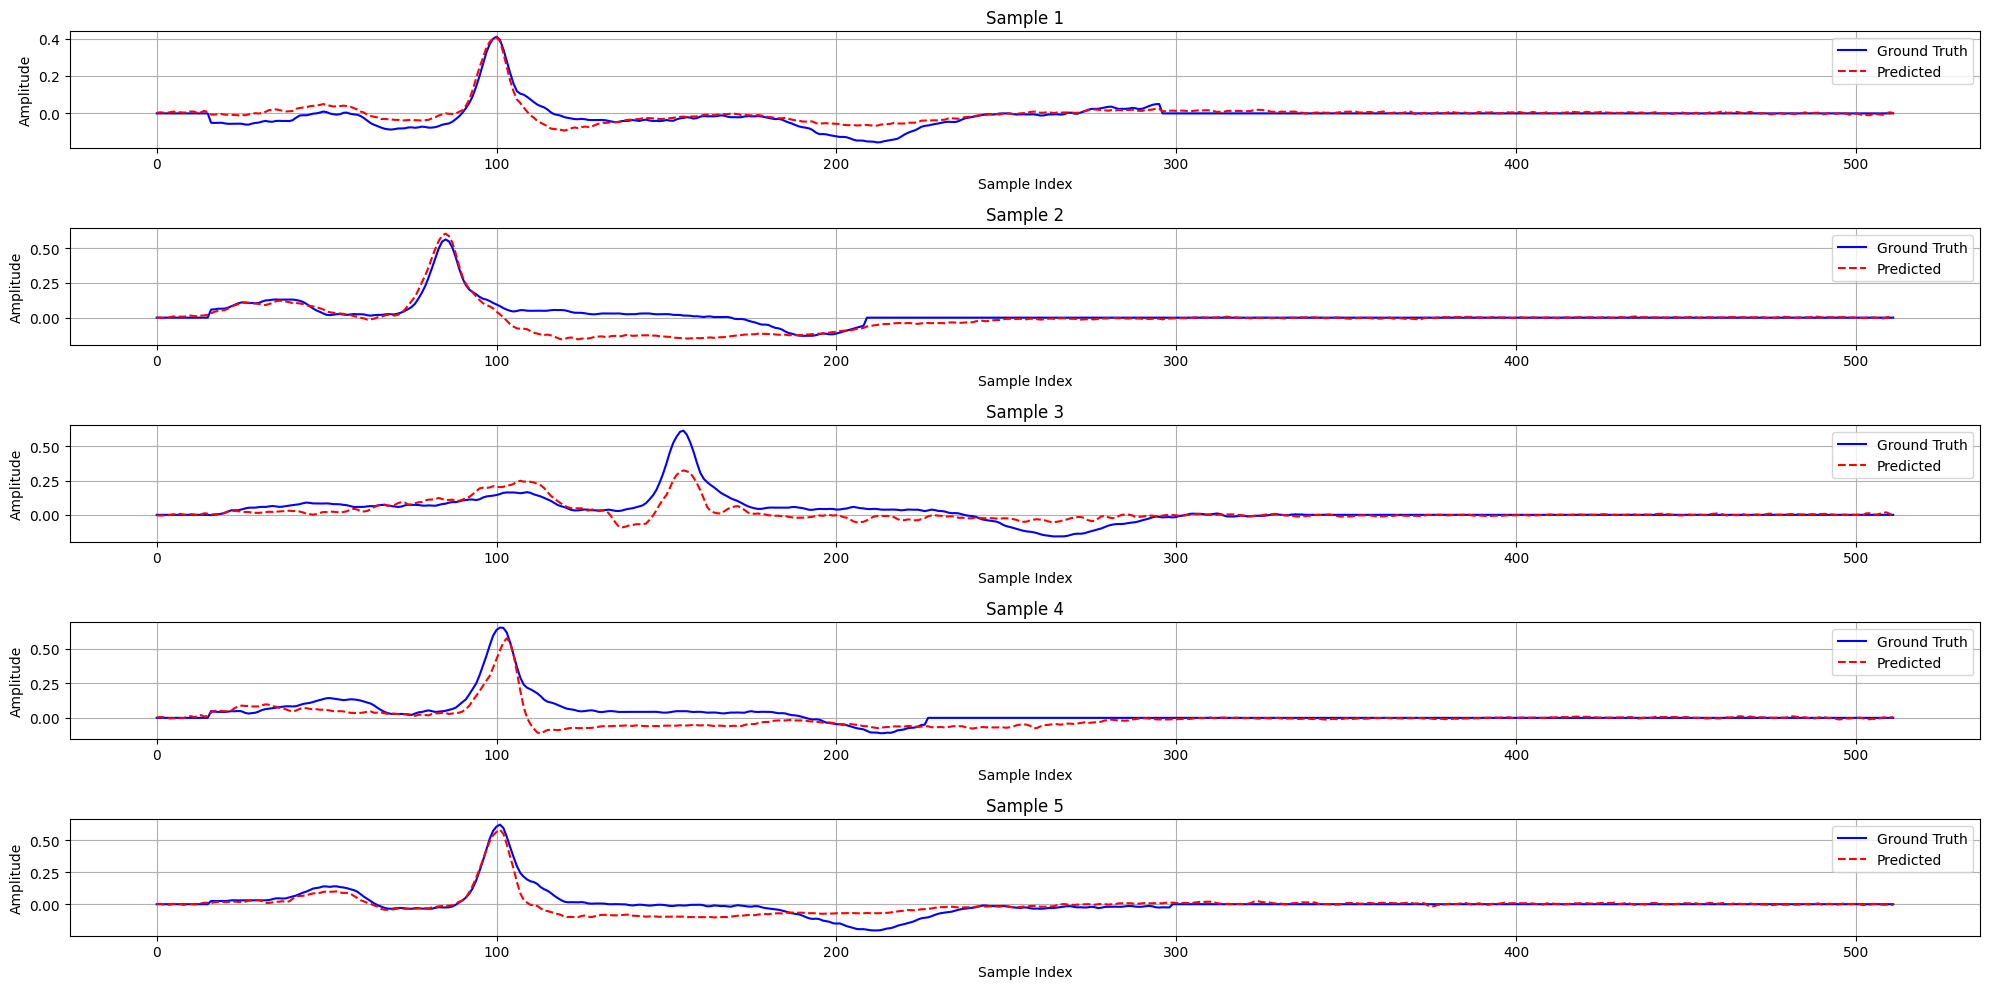

: 

In [ ]:
# 4. Inference 수행
y_pred = model.predict([X_test, F_test_x], batch_size=128, verbose=1)

# 5. 결과 저장
np.save("shap/y_pred.npy", y_pred)

import matplotlib.pyplot as plt
# 시각화할 샘플 수
num_samples = 5

plt.figure(figsize=(20, 10))
for i in range(num_samples):
    plt.subplot(num_samples, 1, i + 1)
    plt.plot(y_test[i], label="Ground Truth", color="blue")
    plt.plot(y_pred[i], label="Predicted", color="red", linestyle="--")
    plt.title(f"Sample {i+1}")
    plt.xlabel("Sample Index")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
import tensorflow as tf
import h5py

# 가중치 파일 경로
weights_path = "shap/Transformer_COMBDAE_weights.best.weights.h5"

# 가중치 파일 열기
with h5py.File(weights_path, 'r') as f:
    print("모든 레이어 이름 및 가중치 정보:")
    for layer_name in f.keys():
        print(f"\nLayer: {layer_name}")
        layer = f[layer_name]
        for weight_name in layer.keys():
            weight = layer[weight_name]
            print(f"  - Weight: {weight_name}")


모든 레이어 이름 및 가중치 정보:

Layer: layers
  - Weight: activation
  - Weight: activation_1
  - Weight: activation_2
  - Weight: activation_3
  - Weight: activation_4
  - Weight: activation_5
  - Weight: batch_normalization
  - Weight: batch_normalization_1
  - Weight: batch_normalization_2
  - Weight: batch_normalization_3
  - Weight: batch_normalization_4
  - Weight: batch_normalization_5
  - Weight: batch_normalization_6
  - Weight: batch_normalization_7
  - Weight: batch_normalization_8
  - Weight: concatenate
  - Weight: conv1d
  - Weight: conv1d_1
  - Weight: conv1d_10
  - Weight: conv1d_11
  - Weight: conv1d_12
  - Weight: conv1d_13
  - Weight: conv1d_14
  - Weight: conv1d_15
  - Weight: conv1d_16
  - Weight: conv1d_17
  - Weight: conv1d_18
  - Weight: conv1d_19
  - Weight: conv1d_2
  - Weight: conv1d_3
  - Weight: conv1d_4
  - Weight: conv1d_5
  - Weight: conv1d_6
  - Weight: conv1d_7
  - Weight: conv1d_8
  - Weight: conv1d_9
  - Weight: conv2d_transpose
  - Weight: conv2d_transpose_1
 

In [10]:
y_pred = np.load("shap/y_pred.npy")
y_pred.shape

(13316, 512, 1)

In [5]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd
import glob
import wfdb
from scipy import signal
from Data_Preparation.data_preparation import Data_Preparation
from Data_Preparation.data_preparation_with_fourier import Data_Preparation_with_Fourier

def resample_signal(x, fs, fs_target):
    t = np.arange(x.shape[0]).astype("float64")
    if fs == fs_target:
        return x, t
    new_length = int(x.shape[0] * fs_target / fs)
    if np.isnan(x).any():
        x = pd.Series(x.reshape((-1,))).interpolate().values
    resampled_x, resampled_t = signal.resample(x, num=new_length, t=t)
    return resampled_x, resampled_t

def load_train_data(my_fs=360):
    signals = []
    for folder_name in [f'A0{i}' for i in range(9)]:
        for sig in glob.glob(f'data/cinc2017/physionet.org/files/challenge-2017/1.0.0/training/{folder_name}/*.hea'):
            # print(f"Loading signal: {sig}")
            my_sig = wfdb.rdsamp(sig[:-4])
            # print(f"Signal shape: {my_sig[0].shape}, fs: {my_sig[1]['fs']}")
            # Signal shape: (5826, 1), fs: 300
            my_sig, _ = resample_signal(my_sig[0], my_sig[1]['fs'], my_fs)
            signals.append(my_sig.reshape((-1,)))
    return signals

def load_test_data(my_fs=360):
    signals = []
    for sig in glob.glob('data/cinc2017/physionet.org/files/challenge-2017/1.0.0/validation/*.hea'):
        my_sig = wfdb.rdsamp(sig[:-4])
        my_sig, _ = resample_signal(my_sig[0], my_sig[1]['fs'], my_fs)
        signals.append(my_sig.reshape((-1,)))
    return signals

def load_noise():
    with open('data/NoiseBWL.pkl', 'rb') as f:
        return pickle.load(f)

def sig_to_parts(sig, part_size=512):
    num_parts = sig.shape[0] // part_size
    return [sig[i * part_size:(i + 1) * part_size] for i in range(num_parts)]

def sigs_to_parts(sigs, part_size=512):
    parts = []
    for sig in sigs:
        parts += sig_to_parts(sig, part_size=part_size)
    return parts


In [1]:
import numpy as np
from scipy.fft import fft
import pickle

def make_fourier(inputs, n, fs):
    """
    Extract frequency domain information and match the shape to time-domain signals.
    """
    T = n / fs
    k = np.arange(n)
    freq = k / T
    freq = freq[range(int(n / 2))]

    signal_list = []
    for i in range(inputs.shape[0]):
        y = inputs[i, :]
        Y = fft(y) / n  # Perform FFT and normalize
        Y = np.abs(Y[range(int(n / 2))])
        # Duplicate to match time-domain size
        Y_full = np.hstack([Y, Y])
        signal_list.append(Y_full)

    return np.asarray(signal_list)

def Data_Preparation_with_Fourier_CINC(samples, fs=360):
    print('Getting the Data ready ...')

    # Load CINC data (beats_train and beats_test)
    beats_train = sigs_to_parts(load_train_data())
    beats_test = sigs_to_parts(load_test_data())
    print(f"[INFO] Loaded CINC data: {len(beats_train)} training beats, {len(beats_test)} testing beats.")

    # Load noise data
    with open('data/CombinedNoise.pkl', 'rb') as input:
        combined_noise = pickle.load(input)
    print(f"[INFO] Loaded CombinedNoise with {len(combined_noise)} channels")

    #####################################
    # Data split and Fourier transform
    #####################################
    sn_train = []
    sn_test = []
    fourier_train_x = []
    fourier_test_x = []
    fourier_train_y = []
    fourier_test_y = []

    print(f"[INFO] Processing CINC data.")
    # Train data processing
    rnd_train = np.random.uniform(0.2, 2.0, size=len(beats_train))
    noise_index = 0
    for i, beat in enumerate(beats_train):
        # Select noise channel and noise sample segment
        channel_idx = i % len(combined_noise)
        noise = combined_noise[channel_idx][:, 0]
        noise_segment = noise[noise_index:noise_index + samples]

        # Scale noise to match beat amplitude
        beat_max_value = np.max(beat) - np.min(beat)
        noise_max_value = np.max(noise_segment) - np.min(noise_segment)
        Ase = noise_max_value / beat_max_value if noise_max_value != 0 else 1
        alpha = rnd_train[i] / Ase
        signal_noise = beat + alpha * noise_segment
        sn_train.append(signal_noise)

        # Fourier transformation
        fourier_transformed_x = make_fourier(signal_noise.reshape(1, -1), samples, fs)
        fourier_train_x.append(fourier_transformed_x[0])  # Append the single batch

        # Fourier transformation for labels
        fourier_transformed_y = make_fourier(beat.reshape(1, -1), samples, fs)
        fourier_train_y.append(fourier_transformed_y[0])  # Append the single batch

        # Update noise index
        noise_index += samples
        if noise_index > (len(noise) - samples):
            noise_index = 0

    # Test data processing
    rnd_test = np.random.uniform(0.2, 2.0, size=len(beats_test))
    np.save('rnd_test_cinc.npy', rnd_test)  # Save rnd_test for later use
    print(f"[INFO] rnd_test shape: {rnd_test.shape}")
    noise_index = 0
    for i, beat in enumerate(beats_test):
        # Select noise channel and noise sample segment
        channel_idx = i % len(combined_noise)
        noise = combined_noise[channel_idx][:, 0]
        noise_segment = noise[noise_index:noise_index + samples]

        # Scale noise to match beat amplitude
        beat_max_value = np.max(beat) - np.min(beat)
        noise_max_value = np.max(noise_segment) - np.min(noise_segment)
        Ase = noise_max_value / beat_max_value if noise_max_value != 0 else 1
        alpha = rnd_test[i] / Ase
        signal_noise = beat + alpha * noise_segment
        sn_test.append(signal_noise)

        # Fourier transformation
        fourier_transformed_x = make_fourier(signal_noise.reshape(1, -1), samples, fs)
        fourier_test_x.append(fourier_transformed_x[0])  # Append the single batch

        # Fourier transformation for labels
        fourier_transformed_y = make_fourier(beat.reshape(1, -1), samples, fs)
        fourier_test_y.append(fourier_transformed_y[0])  # Append the single batch

        # Update noise index
        noise_index += samples
        if noise_index > (len(noise) - samples):
            noise_index = 0

    #####################################
    # Prepare datasets
    #####################################
    X_train = np.array(sn_train)
    X_test = np.array(sn_test)
    y_train = np.array(beats_train)
    y_test = np.array(beats_test)

    # Fourier datasets
    F_train_x = np.array(fourier_train_x)
    F_test_x = np.array(fourier_test_x)
    F_train_y = np.array(fourier_train_y)
    F_test_y = np.array(fourier_test_y)

    # Expand dimensions to match required shape
    X_train = np.expand_dims(X_train, axis=2)
    y_train = np.expand_dims(y_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)
    y_test = np.expand_dims(y_test, axis=2)

    F_train_x = np.expand_dims(F_train_x, axis=2)
    F_train_y = np.expand_dims(F_train_y, axis=2)
    F_test_x = np.expand_dims(F_test_x, axis=2)
    F_test_y = np.expand_dims(F_test_y, axis=2)

    Dataset = [X_train, y_train, X_test, y_test, F_train_x, F_train_y, F_test_x, F_test_y]

    print(f"[INFO] Final shapes -> X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")
    print(f"[INFO] Fourier shapes -> F_train_x: {F_train_x.shape}, F_train_y: {F_train_y.shape}, F_test_x: {F_test_x.shape}, F_test_y: {F_test_y.shape}")
    print('Dataset ready to use.')

    return Dataset

# # Unpack the dataset
# Dataset = Data_Preparation_with_Fourier_CINC(samples=512, fs=360)
# X_train, y_train, X_test, y_test, F_train_x, F_train_y, F_test_x, F_test_y = Dataset

# # Print dataset shapes for confirmation
# print(f"Time domain train shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
# print(f"Frequency domain train shapes: F_train_x: {F_train_x.shape}, F_train_y: {F_train_y.shape}")
# print(f"Time domain test shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")
# print(f"Frequency domain test shapes: F_test_x: {F_test_x.shape}, F_test_y: {F_test_y.shape}")


In [2]:
def Data_Preparation_CINC(samples, fs=360):
    print('Getting the Data ready ...')

    # Load CINC data (beats_train and beats_test)
    beats_train = sigs_to_parts(load_train_data())
    beats_test = sigs_to_parts(load_test_data())
    print(f"[INFO] Loaded CINC data: {len(beats_train)} training beats, {len(beats_test)} testing beats.")

    # Load noise data
    with open('data/CombinedNoise.pkl', 'rb') as input:
        combined_noise = pickle.load(input)
    print(f"[INFO] Loaded CombinedNoise with {len(combined_noise)} channels")

    #####################################
    # Data split and Fourier transform
    #####################################
    sn_train = []
    sn_test = []


    print(f"[INFO] Processing CINC data.")
    # Train data processing
    rnd_train = np.random.uniform(0.2, 2.0, size=len(beats_train))
    noise_index = 0
    for i, beat in enumerate(beats_train):
        # Select noise channel and noise sample segment
        channel_idx = i % len(combined_noise)
        noise = combined_noise[channel_idx][:, 0]
        noise_segment = noise[noise_index:noise_index + samples]

        # Scale noise to match beat amplitude
        beat_max_value = np.max(beat) - np.min(beat)
        noise_max_value = np.max(noise_segment) - np.min(noise_segment)
        Ase = noise_max_value / beat_max_value if noise_max_value != 0 else 1
        alpha = rnd_train[i] / Ase
        signal_noise = beat + alpha * noise_segment
        sn_train.append(signal_noise)

        # Update noise index
        noise_index += samples
        if noise_index > (len(noise) - samples):
            noise_index = 0

    # Test data processing
    rnd_test = np.random.uniform(0.2, 2.0, size=len(beats_test))
    np.save('rnd_test_cinc.npy', rnd_test)  # Save rnd_test for later use
    print(f"[INFO] rnd_test shape: {rnd_test.shape}")
    noise_index = 0
    for i, beat in enumerate(beats_test):
        # Select noise channel and noise sample segment
        channel_idx = i % len(combined_noise)
        noise = combined_noise[channel_idx][:, 0]
        noise_segment = noise[noise_index:noise_index + samples]

        # Scale noise to match beat amplitude
        beat_max_value = np.max(beat) - np.min(beat)
        noise_max_value = np.max(noise_segment) - np.min(noise_segment)
        Ase = noise_max_value / beat_max_value if noise_max_value != 0 else 1
        alpha = rnd_test[i] / Ase
        signal_noise = beat + alpha * noise_segment
        sn_test.append(signal_noise)

        # Update noise index
        noise_index += samples
        if noise_index > (len(noise) - samples):
            noise_index = 0

    #####################################
    # Prepare datasets
    #####################################
    X_train = np.array(sn_train)
    X_test = np.array(sn_test)
    y_train = np.array(beats_train)
    y_test = np.array(beats_test)

    # Expand dimensions to match required shape
    X_train = np.expand_dims(X_train, axis=2)
    y_train = np.expand_dims(y_train, axis=2)
    X_test = np.expand_dims(X_test, axis=2)
    y_test = np.expand_dims(y_test, axis=2)

    Dataset = [X_train, y_train, X_test, y_test]

    print(f"[INFO] Final shapes -> X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

    return Dataset

In [25]:
import numpy as np
from scipy.fft import fft
from scipy.signal import resample_poly
import wfdb
import math
import _pickle as pickle
import glob
import numpy as np
from scipy.signal import resample_poly
import wfdb
import math
import pandas as pd
import _pickle as pickle
import matplotlib.pyplot as plt
from collections import Counter
with open('data/MITDatabase_with_labels.pkl', 'rb') as input:
    mitdb_with_labels = pickle.load(input)

# 15-class에서 5-class로 그룹핑 함수
def group_to_5class(label):
    if 0 <= label <= 4:
        return 0  # Normal beats
    elif 5 <= label <= 8:
        return 1  # Supraventricular beats
    elif 9 <= label <= 10:
        return 2  # Ventricular beats
    elif label == 11:
        return 3  # Fusion beats
    elif 12 <= label <= 14:
        return 4  # Unknown beats
    else:
        return -1  # 오류 방지용 기본값

# 5-class로 변환된 라벨 저장
all_labels_5class = [group_to_5class(label) for pid in mitdb_with_labels.keys() for _, label in mitdb_with_labels[pid]]
all_labels_5class = [label for label in all_labels_5class if label != -1]  # -1 제거

# 5-class 분포 확인
class_counts_5class = Counter(all_labels_5class)
print("5-Class distribution:", class_counts_5class)
def make_fourier(inputs, n, fs):
    """
    주파수 도메인 정보 추출 및 time-domain과 같은 shape으로 만듦.
    """
    T = n / fs
    k = np.arange(n)
    freq = k / T
    freq = freq[range(int(n / 2))]

    signal_list = []
    for i in range(inputs.shape[0]):
        y = inputs[i, :]
        Y = fft(y) / n  # FFT 수행 후 정규화
        Y = np.abs(Y[range(int(n / 2))])
        Y_full = np.hstack([Y, Y])  # Duplicate to match time-domain size (512)
        signal_list.append(Y_full)

    return np.asarray(signal_list)
def Data_Preparation_with_mitdb(samples=512, fs=360):
    """
    MITDB 데이터셋을 준비하고 Fourier 변환된 주파수 도메인 정보와 함께
    라벨(5-Class)도 반환합니다.
    """
    print('Preparing the MITDB dataset with labels...')

    # Set random seed for reproducibility
    seed = 1234
    np.random.seed(seed=seed)
    with open('data/CombinedNoise.pkl', 'rb') as input:
        combined_noise = pickle.load(input)
    print(f"[INFO] Loaded CombinedNoise with {len(combined_noise)} channels")
    # Load MIT Database with labels
    with open('data/MITDatabase_balanced.pkl', 'rb') as input:
        mitdb_with_labels = pickle.load(input)
    print(f"[INFO] Loaded MITDatabase with {len(mitdb_with_labels.keys())} signals")
    beats = []
    labels = []
    fourier_y = []
    X_data = []
    y_data = []
    for signal_name in mitdb_with_labels.keys():
        # pid = int(signal_name)  # signal_name을 정수형 환자 ID로 변환
        for beat, label in mitdb_with_labels[signal_name]:  # 비트와 라벨을 함께 처리
            b_np = np.zeros(samples)
            b_sq = np.array(beat)

            init_padding = 16
            if b_sq.shape[0] > (samples - init_padding):  # 샘플 길이를 초과하는 경우 스킵
                skip_beats += 1
                continue

            # 비트 데이터를 0으로 패딩하고 중심화 (Centering)
            b_np[init_padding:b_sq.shape[0] + init_padding] = b_sq - (b_sq[0] + b_sq[-1]) / 2

            # Fourier 변환 수행 (주파수 도메인 정보 생성)
            fourier_transformed_y = make_fourier(b_np.reshape(1, -1), samples, fs)

            # 데이터 저장
            X_data.append(b_np)
            y_data.append(label)
            beats.append(b_np)  # 비트 데이터
            labels.append(group_to_5class(label))  # 5-Class 라벨 저장
            fourier_y.append(fourier_transformed_y[0])  # Fourier 변환 결과 저장
                
    #####################################
    # Data split (80% train, 20% test)
    #####################################
    beats = np.array(beats)
    labels = np.array(labels)
    fourier_y = np.array(fourier_y)
    X_data = np.array(X_data)
    y_data = np.array(y_data)
    from sklearn.model_selection import StratifiedShuffleSplit
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
    for train_idx, test_idx in sss.split(X_data, y_data):
        beats_train, beats_test = X_data[train_idx], X_data[test_idx]
        labels_train, labels_test = y_data[train_idx], y_data[test_idx]
        fourier_train_y, fourier_test_y = fourier_y[train_idx], fourier_y[test_idx]        
    print(f"[INFO] beats_train: {len(beats_train)}, beats_test: {len(beats_test)}")


    #####################################
    # Adding noise to train and test sets
    #####################################
    print(f"[INFO] Adding noise to train and test sets")

    def add_noise(beats, rnd, combined_noise, samples):
        sn = []
        fourier_x = []
        noise_index = 0
        for beat_idx, beat in enumerate(beats):
            selected_channel = beat_idx % 2
            noise_combination_idx = 0
            noise = combined_noise[selected_channel][:, noise_combination_idx]
            noise_segment = noise[noise_index:noise_index + samples]
            beat_max_value = np.max(beat) - np.min(beat)
            noise_max_value = np.max(noise_segment) - np.min(noise_segment)
            Ase = 1 if noise_max_value == 0 else noise_max_value / beat_max_value
            alpha = rnd[beat_idx] / Ase
            signal_noise = beat + alpha * noise_segment
            sn.append(signal_noise)
            fourier_transformed_x = make_fourier(signal_noise.reshape(1, -1), samples, fs)
            fourier_x.append(fourier_transformed_x[0])
            noise_index += samples
            if noise_index > (len(noise) - samples):
                noise_index = 0
        return sn, fourier_x

    # Random scaling factor for train and test
    rnd_train = np.random.randint(low=20, high=200, size=len(beats_train)) / 100
    rnd_test = np.random.randint(low=20, high=200, size=len(beats_test)) / 100

    # Add noise to train and test sets
    sn_train, fourier_train_x = add_noise(beats_train, rnd_train, combined_noise, samples)
    sn_test, fourier_test_x = add_noise(beats_test, rnd_test, combined_noise, samples)

    #####################################
    # Convert to NumPy arrays and reshape
    #####################################
    X_train = np.expand_dims(np.array(sn_train), axis=2)
    y_train = np.expand_dims(np.array(beats_train), axis=2)
    X_test = np.expand_dims(np.array(sn_test), axis=2)
    y_test = np.expand_dims(np.array(beats_test), axis=2)
    F_train_x = np.expand_dims(np.array(fourier_train_x), axis=2)
    F_train_y = np.expand_dims(np.array(fourier_train_y), axis=2)
    F_test_x = np.expand_dims(np.array(fourier_test_x), axis=2)
    F_test_y = np.expand_dims(np.array(fourier_test_y), axis=2)

    y_train_label = np.array(labels_train)  # 라벨 반환
    y_test_label = np.array(labels_test)

    Dataset = [X_train, y_train, X_test, y_test, y_train_label, y_test_label]

    print(f"[INFO] Final shapes -> X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")
    print(f"[INFO] Labels -> y_train_label: {y_train_label.shape}, y_test_label: {y_test_label.shape}")
    print('Dataset ready to use.')

    return Dataset


def Data_Preparation_with_Fourier_mitdb(samples=512, fs=360):
    """
    MITDB 데이터셋을 준비하고 Fourier 변환된 주파수 도메인 정보와 함께
    라벨(5-Class)도 반환합니다.
    """
    print('Preparing the MITDB dataset with labels...')

    # Set random seed for reproducibility
    seed = 1234
    np.random.seed(seed=seed)
    with open('data/CombinedNoise.pkl', 'rb') as input:
        combined_noise = pickle.load(input)
    print(f"[INFO] Loaded CombinedNoise with {len(combined_noise)} channels")
    # Load MIT Database with labels
    with open('data/MITDatabase_balanced.pkl', 'rb') as input:
        mitdb_with_labels = pickle.load(input)
    print(f"[INFO] Loaded MITDatabase with {len(mitdb_with_labels.keys())} signals")
    beats = []
    labels = []
    fourier_y = []
    X_data = []
    y_data = []
    for signal_name in mitdb_with_labels.keys():
        # pid = int(signal_name)  # signal_name을 정수형 환자 ID로 변환
        for beat, label in mitdb_with_labels[signal_name]:  # 비트와 라벨을 함께 처리
            b_np = np.zeros(samples)
            b_sq = np.array(beat)

            init_padding = 16
            if b_sq.shape[0] > (samples - init_padding):  # 샘플 길이를 초과하는 경우 스킵
                skip_beats += 1
                continue

            # 비트 데이터를 0으로 패딩하고 중심화 (Centering)
            b_np[init_padding:b_sq.shape[0] + init_padding] = b_sq - (b_sq[0] + b_sq[-1]) / 2

            # Fourier 변환 수행 (주파수 도메인 정보 생성)
            fourier_transformed_y = make_fourier(b_np.reshape(1, -1), samples, fs)

            # 데이터 저장
            X_data.append(b_np)
            y_data.append(label)
            beats.append(b_np)  # 비트 데이터
            labels.append(group_to_5class(label))  # 5-Class 라벨 저장
            fourier_y.append(fourier_transformed_y[0])  # Fourier 변환 결과 저장
                
    #####################################
    # Data split (80% train, 20% test)
    #####################################
    beats = np.array(beats)
    labels = np.array(labels)
    fourier_y = np.array(fourier_y)
    X_data = np.array(X_data)
    y_data = np.array(y_data)

    from sklearn.model_selection import StratifiedShuffleSplit

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1234)
    for train_idx, test_idx in sss.split(X_data, y_data):
        beats_train, beats_test = X_data[train_idx], X_data[test_idx]
        labels_train, labels_test = y_data[train_idx], y_data[test_idx]
        fourier_train_y, fourier_test_y = fourier_y[train_idx], fourier_y[test_idx]
        
    print(f"[INFO] beats_train: {len(beats_train)}, beats_test: {len(beats_test)}")

    #####################################
    # Adding noise to train and test sets
    #####################################
    print(f"[INFO] Adding noise to train and test sets")

    def add_noise(beats, rnd, combined_noise, samples):
        sn = []
        fourier_x = []
        noise_index = 0
        for beat_idx, beat in enumerate(beats):
            selected_channel = beat_idx % 2
            noise_combination_idx = 0
            noise = combined_noise[selected_channel][:, noise_combination_idx]
            noise_segment = noise[noise_index:noise_index + samples]
            beat_max_value = np.max(beat) - np.min(beat)
            noise_max_value = np.max(noise_segment) - np.min(noise_segment)
            Ase = 1 if noise_max_value == 0 else noise_max_value / beat_max_value
            alpha = rnd[beat_idx] / Ase
            signal_noise = beat + alpha * noise_segment
            sn.append(signal_noise)
            fourier_transformed_x = make_fourier(signal_noise.reshape(1, -1), samples, fs)
            fourier_x.append(fourier_transformed_x[0])
            noise_index += samples
            if noise_index > (len(noise) - samples):
                noise_index = 0
        return sn, fourier_x

    # Random scaling factor for train and test
    rnd_train = np.random.randint(low=20, high=200, size=len(beats_train)) / 100
    rnd_test = np.random.randint(low=20, high=200, size=len(beats_test)) / 100

    # Add noise to train and test sets
    sn_train, fourier_train_x = add_noise(beats_train, rnd_train, combined_noise, samples)
    sn_test, fourier_test_x = add_noise(beats_test, rnd_test, combined_noise, samples)

    #####################################
    # Convert to NumPy arrays and reshape
    #####################################
    X_train = np.expand_dims(np.array(sn_train), axis=2)
    y_train = np.expand_dims(np.array(beats_train), axis=2)
    X_test = np.expand_dims(np.array(sn_test), axis=2)
    y_test = np.expand_dims(np.array(beats_test), axis=2)
    F_train_x = np.expand_dims(np.array(fourier_train_x), axis=2)
    F_train_y = np.expand_dims(np.array(fourier_train_y), axis=2)
    F_test_x = np.expand_dims(np.array(fourier_test_x), axis=2)
    F_test_y = np.expand_dims(np.array(fourier_test_y), axis=2)

    y_train_label = np.array(labels_train)  # 라벨 반환
    y_test_label = np.array(labels_test)

    Dataset = [X_train, y_train, X_test, y_test, F_train_x, F_train_y, F_test_x, F_test_y, y_train_label, y_test_label]

    print(f"[INFO] Final shapes -> X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")
    print(f"[INFO] Labels -> y_train_label: {y_train_label.shape}, y_test_label: {y_test_label.shape}")
    print('Dataset ready to use.')

    return Dataset


5-Class distribution: Counter({0: 90589, 4: 8039, 2: 7236, 1: 2779, 3: 803})


In [ ]:
# Unpack the dataset
Dataset = Data_Preparation_with_Fourier_mitdb(samples=512, fs=360)
X_train, y_train, X_test, y_test, F_train_x, F_train_y, F_test_x, F_test_y, y_train_label, y_test_label = Dataset


# Print dataset shapes for confirmation
print(f"Time domain train shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Frequency domain train shapes: F_train_x: {F_train_x.shape}, F_train_y: {F_train_y.shape}")
print(f"Time domain test shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"Frequency domain test shapes: F_test_x: {F_test_x.shape}, F_test_y: {F_test_y.shape}")

Preparing the MITDB dataset with labels...
[INFO] Loaded CombinedNoise with 2 channels
[INFO] Loaded MITDatabase with 100 signals
[INFO] beats_train: 80000, beats_test: 20000
[INFO] Adding noise to train and test sets
[INFO] Final shapes -> X_train: (80000, 512, 1), y_train: (80000, 512, 1), X_test: (20000, 512, 1), y_test: (20000, 512, 1)
[INFO] Labels -> y_train_label: (80000,), y_test_label: (20000,)
Dataset ready to use.
Time domain train shapes: X_train: (80000, 512, 1), y_train: (80000, 512, 1)
Frequency domain train shapes: F_train_x: (80000, 512, 1), F_train_y: (80000, 512, 1)
Time domain test shapes: X_test: (20000, 512, 1), y_test: (20000, 512, 1)
Frequency domain test shapes: F_test_x: (20000, 512, 1), F_test_y: (20000, 512, 1)


In [27]:
import os
# 데이터 저장 경로 설정
output_dir = "cinc17"
os.makedirs(output_dir, exist_ok=True)
# Dataset = Data_Preparation_with_Fourier_CINC(samples=512, fs=360)
Dataset =Data_Preparation_with_Fourier_mitdb(samples=512, fs=360)
X_train, y_train, X_test, y_test, F_train_x, F_train_y, F_test_x, F_test_y, y_train_label, y_test_label = Dataset      
# 데이터 저장
np.save(f"{output_dir}/X_train.npy", X_train)
np.save(f"{output_dir}/y_train.npy", y_train)
np.save(f"{output_dir}/X_test.npy", X_test)
np.save(f"{output_dir}/y_test.npy", y_test)
np.save(f"{output_dir}/F_train_x.npy", F_train_x)
np.save(f"{output_dir}/F_train_y.npy", F_train_y)
np.save(f"{output_dir}/F_test_x.npy", F_test_x)
np.save(f"{output_dir}/F_test_y.npy", F_test_y)

print(f"Data successfully saved in {output_dir} directory!")
# 데이터 로드
X_train = np.load(f"{output_dir}/X_train.npy")
y_train = np.load(f"{output_dir}/y_train.npy")
X_test = np.load(f"{output_dir}/X_test.npy")
y_test = np.load(f"{output_dir}/y_test.npy")
F_train_x = np.load(f"{output_dir}/F_train_x.npy")
F_train_y = np.load(f"{output_dir}/F_train_y.npy")
F_test_x = np.load(f"{output_dir}/F_test_x.npy")
F_test_y = np.load(f"{output_dir}/F_test_y.npy")

print(f"Data successfully loaded! Shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print(f"F_train_x: {F_train_x.shape}, F_train_y: {F_train_y.shape}")
print(f"F_test_x: {F_test_x.shape}, F_test_y: {F_test_y.shape}")


Preparing the MITDB dataset with labels...
[INFO] Loaded CombinedNoise with 2 channels
[INFO] Loaded MITDatabase with 200 signals
[INFO] beats_train: 160000, beats_test: 40000
[INFO] Adding noise to train and test sets
[INFO] Final shapes -> X_train: (160000, 512, 1), y_train: (160000, 512, 1), X_test: (40000, 512, 1), y_test: (40000, 512, 1)
[INFO] Labels -> y_train_label: (160000,), y_test_label: (40000,)
Dataset ready to use.
Data successfully saved in cinc17 directory!
Data successfully loaded! Shapes:
X_train: (160000, 512, 1), y_train: (160000, 512, 1)
X_test: (40000, 512, 1), y_test: (40000, 512, 1)
F_train_x: (160000, 512, 1), F_train_y: (160000, 512, 1)
F_test_x: (40000, 512, 1), F_test_y: (40000, 512, 1)


In [7]:
import numpy as np
import tensorflow as tf
from deepFilter.dl_models import (
    DRRN_denoising, FCN_DAE, deep_filter_model_I_LANL_dilated,
    AttentionSkipDAE, Transformer_DAE, Transformer_COMBDAE
)
from deepFilter.dl_pipeline import train_dl, test_dl
from datetime import datetime
import os
import pickle

2025-02-15 18:14:21.202990: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-15 18:14:21.208994: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739610861.215465 1964553 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739610861.217355 1964553 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-15 18:14:21.224049: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [29]:
from deepFilter.dl_pipeline import train_dl, test_dl

dl_experiments = ['DRNN','FCN-DAE', 'DeepFilter','AttentionSkipDAE','Transformer_DAE','Transformer_COMBDAE']
train_time_list = []
test_time_list = []
    
    # Get the current date in 'MMDD' format
current_date = datetime.now().strftime('%m%d')
for experiment in dl_experiments:
    # 데이터 준비 단계
    if experiment == 'FCN-DAE':
        # FCN_DAE
        model = FCN_DAE()
        model_label = 'FCN_DAE'

    elif experiment == 'DRNN':
        # DRNN
        model = DRRN_denoising()
        model_label = 'DRNN'

    elif experiment == 'DeepFilter':
        # Inception-like linear and non linear dilated
        model = deep_filter_model_I_LANL_dilated()
        model_label = 'DeepFilter'

    elif experiment == 'AttentionSkipDAE':
        # Inception-like linear and non linear dilated
        model = AttentionSkipDAE()
        model_label = 'AttentionSkipDAE'
        
    elif experiment == 'Transformer_DAE':
        model = Transformer_DAE()
        model_label = 'Transformer_DAE'
        
    else:
        model = Transformer_COMBDAE()
        model_label = 'Transformer_COMBDAE'   
        
    if experiment in ['Transformer_COMBDAE']:
        Dataset = Data_Preparation_with_Fourier_mitdb(samples=512, fs=360)
        X_train, y_train, X_test, y_test, F_train_x, F_train_y, F_test_x, F_test_y, y_train_label, y_test_label = Dataset      
    else:
        Dataset = Data_Preparation_with_mitdb(samples=512)
        X_train, y_train, X_test, y_test,  y_train_label, y_test_label = Dataset
 
    if experiment == 'Transformer_COMBDAE':
        model.build(input_shape=[(None, 512, 1), (None, 512, 1)])
        # 가중치 로드 (파일 경로/이름은 환경에 맞게 수정)
        try:
            model.load_weights("0212_censd/Transformer_COMBDAE_weights.best.weights.h5")
            print("Model weights loaded successfully!")
        except ValueError as e:
            print(f"Error loading weights: {e}")
    else:
        # 필요에 따라 input_shape 변경
        model.build(input_shape=(None, 512, 1))
        try:
            model.load_weights(os.path.join('0212_censd', model_label + '_weights.best.weights.h5'))
            print("Model weights loaded successfully!")
        except ValueError as e:
            print(f"Error loading weights: {e}")
                    
    save_dir = current_date 
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
        
    if experiment in ['Transformer_COMBDAE']:
        y_pred = model.predict([X_test, F_test_x], batch_size=128, verbose=1)
        # with open(os.path.join(save_dir, 'cinc_' + 'y_pred_' + experiment + '.npy'), 'wb') as output:
        #     np.save(y_pred, output)
    else:
        y_pred = model.predict(X_test, batch_size=128, verbose=1)
        # with open(os.path.join(save_dir, 'cinc_' + 'y_pred_' + experiment + '.npy'), 'wb') as output:
        #     np.save(y_pred, output)
    npy_filename = os.path.join(save_dir, f'cinc_y_pred_{experiment}.npy')
    with open(npy_filename, 'wb') as output:
        np.save(output, y_pred)            
    test_results = [X_test, y_test, y_pred]
    with open(os.path.join(save_dir, 'cinc_' + 'test_results_' + experiment + '.pkl'), 'wb') as output:
        pickle.dump(test_results, output)
        
    print('Results from experiment ' + experiment + ' saved')

/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Preparing the MITDB dataset with labels...
[INFO] Loaded CombinedNoise with 2 channels
[INFO] Loaded MITDatabase with 200 signals
[INFO] beats_train: 160000, beats_test: 40000
[INFO] Adding noise to train and test sets
[INFO] Final shapes -> X_train: (160000, 512, 1), y_train: (160000, 512, 1), X_test: (40000, 512, 1), y_test: (40000, 512, 1)
[INFO] Labels -> y_train_label: (160000,), y_test_label: (40000,)
Dataset ready to use.
Model weights loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Results from experiment DRNN saved
Preparing the MITDB dataset with labels...
[INFO] Loaded CombinedNoise with 2 channels


/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] Loaded MITDatabase with 200 signals
[INFO] beats_train: 160000, beats_test: 40000
[INFO] Adding noise to train and test sets
[INFO] Final shapes -> X_train: (160000, 512, 1), y_train: (160000, 512, 1), X_test: (40000, 512, 1), y_test: (40000, 512, 1)
[INFO] Labels -> y_train_label: (160000,), y_test_label: (40000,)
Dataset ready to use.
Model weights loaded successfully!


/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1637']
Received: inputs=Tensor(shape=(128, 512, 1))
  warnings.warn(msg)


257/313 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step

/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1637']
Received: inputs=Tensor(shape=(None, 512, 1))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Results from experiment FCN-DAE saved
Preparing the MITDB dataset with labels...
[INFO] Loaded CombinedNoise with 2 channels
[INFO] Loaded MITDatabase with 200 signals
[INFO] beats_train: 160000, beats_test: 40000
[INFO] Adding noise to train and test sets
[INFO] Final shapes -> X_train: (160000, 512, 1), y_train: (160000, 512, 1), X_test: (40000, 512, 1), y_test: (40000, 512, 1)
[INFO] Labels -> y_train_label: (160000,), y_test_label: (40000,)
Dataset ready to use.
Model weights loaded successfully!


/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1691']
Received: inputs=Tensor(shape=(128, 512, 1))
  warnings.warn(msg)


304/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1691']
Received: inputs=Tensor(shape=(None, 512, 1))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Results from experiment DeepFilter saved


/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Preparing the MITDB dataset with labels...
[INFO] Loaded CombinedNoise with 2 channels
[INFO] Loaded MITDatabase with 200 signals
[INFO] beats_train: 160000, beats_test: 40000
[INFO] Adding noise to train and test sets
[INFO] Final shapes -> X_train: (160000, 512, 1), y_train: (160000, 512, 1), X_test: (40000, 512, 1), y_test: (40000, 512, 1)
[INFO] Labels -> y_train_label: (160000,), y_test_label: (40000,)
Dataset ready to use.
Model weights loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Results from experiment AttentionSkipDAE saved
Preparing the MITDB dataset with labels...
[INFO] Loaded CombinedNoise with 2 channels


/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] Loaded MITDatabase with 200 signals
[INFO] beats_train: 160000, beats_test: 40000
[INFO] Adding noise to train and test sets
[INFO] Final shapes -> X_train: (160000, 512, 1), y_train: (160000, 512, 1), X_test: (40000, 512, 1), y_test: (40000, 512, 1)
[INFO] Labels -> y_train_label: (160000,), y_test_label: (40000,)
Dataset ready to use.
Model weights loaded successfully!


/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1802']
Received: inputs=Tensor(shape=(128, 512, 1))
  warnings.warn(msg)


307/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1802']
Received: inputs=Tensor(shape=(None, 512, 1))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Results from experiment Transformer_DAE saved
Preparing the MITDB dataset with labels...
[INFO] Loaded CombinedNoise with 2 channels


/home/dhc99/anaconda3/envs/ECGDENOISE/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] Loaded MITDatabase with 200 signals
[INFO] beats_train: 160000, beats_test: 40000
[INFO] Adding noise to train and test sets
[INFO] Final shapes -> X_train: (160000, 512, 1), y_train: (160000, 512, 1), X_test: (40000, 512, 1), y_test: (40000, 512, 1)
[INFO] Labels -> y_train_label: (160000,), y_test_label: (40000,)
Dataset ready to use.
Model weights loaded successfully!
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Results from experiment Transformer_COMBDAE saved


In [ ]:
# import wfdb
# import _pickle as pickle
# from datetime import datetime
# import numpy as np

# dl_experiments = ['DRNN','FCN-DAE', 'DeepFilter','AttentionSkipDAE','Transformer_DAE','Transformer_COMBDAE']
#     # dl_experiments = ['Transformer_DAE','AttentionSkipDAE']
# import wfdb
# import _pickle as pickle
# from datetime import datetime
# import numpy as np

# # Load Results Transformer_FDAE
# with open('shap/test_results_'  + dl_experiments[5] + '.pkl', 'rb') as input:
#     test_Transformer_COMBDAE = pickle.load(input)

# # Transformer_COMBDAE
# [X_test, y_test, y_pred] = test_Transformer_COMBDAE


In [10]:

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import wfdb
import numpy as np
import pickle

def SSD(y, y_pred):
    return np.sum(np.square(y - y_pred), axis=1)  # axis 1 is the signal dimension


def MAD(y, y_pred):
    return np.max(np.abs(y - y_pred), axis=1) # axis 1 is the signal dimension


def PRD(y, y_pred):
    N = np.sum(np.square(y_pred - y), axis=1)
    D = np.sum(np.square(y_pred - np.mean(y)), axis=1)

    PRD = np.sqrt(N/D) * 100

    return PRD

def COS_SIM(y, y_pred):
    cos_sim = []

    y = np.squeeze(y, axis=-1)
    y_pred = np.squeeze(y_pred, axis=-1)

    for idx in range(len(y)):
        kl_temp = cosine_similarity(y[idx].reshape(1, -1), y_pred[idx].reshape(1, -1))
        cos_sim.append(kl_temp)

    cos_sim = np.array(cos_sim)
    return cos_sim

def SNR(y, y_pred):
    signal_power = np.sum(np.square(y), axis=1)
    noise_power = np.sum(np.square(y - y_pred), axis=1)
    
    # 분모가 0이 되는 것을 방지하기 위해 작은 값을 더해줌
    noise_power = np.where(noise_power == 0, 1e-10, noise_power)
    
    snr_value = 10 * np.log10(signal_power / noise_power)
    return snr_value


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from prettytable import PrettyTable

def generate_table(metrics, metric_values, Exp_names):
    # Print tabular results in the console, in a pretty way
    print('\n')

    tb = PrettyTable()
    ind = 0

    for exp_name in Exp_names:

        tb.field_names = ['Model'] + metrics

        tb_row = []
        tb_row.append(exp_name)

        for metric in metric_values:   # metric_values[metric][model][beat]
            m_mean = np.mean(metric[ind])
            m_std = np.std(metric[ind])
            tb_row.append('{:.3f}'.format(m_mean) + ' (' + '{:.3f}'.format(m_std) + ')')

        tb.add_row(tb_row)
        ind += 1

    print(tb)

def generate_table_time(column_names, all_values, Exp_names, gpu=True):
    # Print tabular results in the console, in a pretty way

    # The FIR and IIR are the last on all_values
    # We need circular shift them to the right
    all_values[0] = all_values[0][-2::] + all_values[0][0:-2]
    all_values[1] = all_values[1][-2::] + all_values[1][0:-2]

    print('\n')

    tb = PrettyTable()
    ind = 0

    if gpu:
        device = 'GPU'
    else:
        device = 'CPU'

    for exp_name in Exp_names:
        tb.field_names = ['Method/Model'] + [column_names[0] + '(' + device + ') h:m:s:ms'] + [
            column_names[1] + '(' + device + ') h:m:s:ms']

        tb_row = []
        tb_row.append(exp_name)
        tb_row.append(all_values[0][ind])
        tb_row.append(all_values[1][ind])

        tb.add_row(tb_row)

        ind += 1

    print(tb)

    if gpu:
        print('* For FIR and IIR Filters is CPU since scipy filters are CPU based implementations')



In [30]:
import wfdb
import _pickle as pickle
from datetime import datetime
import numpy as np

dl_experiments = ['DRNN','FCN-DAE', 'DeepFilter','AttentionSkipDAE','Transformer_DAE','Transformer_COMBDAE']
    # dl_experiments = ['Transformer_DAE','AttentionSkipDAE']

In [ ]:
with open('0215/cinc_test_results_' + dl_experiments[0] + '.pkl', 'rb') as input:
    test_DRNN = pickle.load(input)
# Load Results FCN_DAE
with open('0215/cinc_test_results_'  + dl_experiments[1] + '.pkl', 'rb') as input:
    test_FCN_DAE = pickle.load(input)
# Load Results DeepFilter
with open('0215/cinc_test_results_'  + dl_experiments[2] + '.pkl', 'rb') as input:
    test_DeepFilter = pickle.load(input)
# Load Results AttentionSkipDAE
with open('0215/cinc_test_results_'  + dl_experiments[3] + '.pkl', 'rb') as input:
    test_AttentionSkipDAE = pickle.load(input)
# Load Results Transformer_DAE
with open('0215/cinc_test_results_'  + dl_experiments[4] + '.pkl', 'rb') as input:
    test_Transformer_DAE = pickle.load(input)
# Load Results Transformer_FDAE
with open('0215/cinc_test_results_'  + dl_experiments[5] + '.pkl', 'rb') as input:
    test_Transformer_COMBDAE = pickle.load(input)
            
####### Calculate Metrics #######
print('Calculating metrics ...')
# DL Metrics
# Exp FCN-DAE
[X_test, y_test, y_pred] = test_DRNN
SSD_values_DL_DRNN = SSD(y_test, y_pred)
MAD_values_DL_DRNN = MAD(y_test, y_pred)
PRD_values_DL_DRNN = PRD(y_test, y_pred)
COS_SIM_values_DL_DRNN = COS_SIM(y_test, y_pred)
SNR_values_DL_DRNN = SNR(y_test, y_pred)

# Exp FCN-DAE
[X_test, y_test, y_pred] = test_FCN_DAE
SSD_values_DL_FCN_DAE = SSD(y_test, y_pred)
MAD_values_DL_FCN_DAE = MAD(y_test, y_pred)
PRD_values_DL_FCN_DAE = PRD(y_test, y_pred)
COS_SIM_values_DL_FCN_DAE = COS_SIM(y_test, y_pred)
SNR_values_DL_FCN_DAE = SNR(y_test, y_pred)

# DeepFilter
[X_test, y_test, y_pred] = test_DeepFilter
SSD_values_DL_exp_1 = SSD(y_test, y_pred)
MAD_values_DL_exp_1 = MAD(y_test, y_pred)
PRD_values_DL_exp_1 = PRD(y_test, y_pred)
COS_SIM_values_DL_exp_1 = COS_SIM(y_test, y_pred)
SNR_values_DL_exp_1 = SNR(y_test, y_pred)

# AttentionSkipDAE
[X_test, y_test, y_pred] = test_AttentionSkipDAE
SSD_values_DL_exp_2 = SSD(y_test, y_pred)
MAD_values_DL_exp_2 = MAD(y_test, y_pred)
PRD_values_DL_exp_2 = PRD(y_test, y_pred)
COS_SIM_values_DL_exp_2 = COS_SIM(y_test, y_pred)
SNR_values_DL_exp_2 = SNR(y_test, y_pred)

# Transformer_DAE
[X_test, y_test, y_pred] = test_Transformer_DAE
SSD_values_DL_exp_3 = SSD(y_test, y_pred)
MAD_values_DL_exp_3 = MAD(y_test, y_pred)
PRD_values_DL_exp_3 = PRD(y_test, y_pred)
COS_SIM_values_DL_exp_3 = COS_SIM(y_test, y_pred)
SNR_values_DL_exp_3 = SNR(y_test, y_pred)

# Transformer_COMBDAE
[X_test, y_test, y_pred] = test_Transformer_COMBDAE
SSD_values_DL_exp_4 = SSD(y_test, y_pred)
MAD_values_DL_exp_4 = MAD(y_test, y_pred)
PRD_values_DL_exp_4 = PRD(y_test, y_pred)
COS_SIM_values_DL_exp_4 = COS_SIM(y_test, y_pred)
SNR_values_DL_exp_4 = SNR(y_test, y_pred)


SSD_all = [
            SSD_values_DL_FCN_DAE,
            SSD_values_DL_DRNN,
            SSD_values_DL_exp_1,
            SSD_values_DL_exp_2,
            SSD_values_DL_exp_3,
            SSD_values_DL_exp_4]

MAD_all = [
        MAD_values_DL_FCN_DAE,
        MAD_values_DL_DRNN,
        MAD_values_DL_exp_1,
        MAD_values_DL_exp_2,
        MAD_values_DL_exp_3,
        MAD_values_DL_exp_4
        ]

PRD_all = [
        PRD_values_DL_FCN_DAE,
        PRD_values_DL_DRNN,
        PRD_values_DL_exp_1,
        PRD_values_DL_exp_2,
        PRD_values_DL_exp_3,
        PRD_values_DL_exp_4
        ]
CORR_all = [
            COS_SIM_values_DL_FCN_DAE,
            COS_SIM_values_DL_DRNN,
            COS_SIM_values_DL_exp_1,
            COS_SIM_values_DL_exp_2,
            COS_SIM_values_DL_exp_3,
            COS_SIM_values_DL_exp_4
            ]
SNR_all = [
        SNR_values_DL_FCN_DAE,
        SNR_values_DL_DRNN,
        SNR_values_DL_exp_1,
        SNR_values_DL_exp_2,
        SNR_values_DL_exp_3,
        SNR_values_DL_exp_4]
Exp_names = dl_experiments
metrics = ['SSD', 'MAD', 'PRD', 'COS_SIM', 'SNR']
metric_values = [SSD_all, MAD_all, PRD_all, CORR_all, SNR_all]
# Metrics table
generate_table(metrics, metric_values, Exp_names)


Calculating metrics ...


+---------------------+------------------+---------------+------------------+---------------+---------------+
|        Model        |       SSD        |      MAD      |       PRD        |    COS_SIM    |      SNR      |
+---------------------+------------------+---------------+------------------+---------------+---------------+
|         DRNN        | 62.518 (125.445) | 0.953 (0.634) | 95.559 (63.370)  | 0.733 (0.219) | 4.396 (3.170) |
|       FCN-DAE       | 64.446 (120.749) | 0.966 (0.651) | 111.712 (70.992) | 0.718 (0.211) | 3.872 (3.013) |
|      DeepFilter     | 54.444 (109.281) | 0.788 (0.593) | 97.050 (71.810)  | 0.778 (0.181) | 4.925 (3.130) |
|   AttentionSkipDAE  | 57.758 (123.005) | 0.794 (0.596) | 91.815 (67.350)  | 0.775 (0.209) | 5.305 (3.494) |
|   Transformer_DAE   | 54.605 (110.211) | 0.800 (0.614) | 88.338 (62.333)  | 0.786 (0.191) | 5.527 (3.728) |
| Transformer_COMBDAE | 55.289 (115.460) | 0.801 (0.619) | 88.599 (63.851)  | 0.788 (0.197) | 

: 